# Assignment 4. Semiconductor Manufacturer, Artificial Neural Network 

## Project Description

This project builds an Artificial Neural Network (ANN) model to predict whether a manufactured part passes or fails.


Source: https://www.kaggle.com/saurabhbagchi/fmst-semiconductor-manufacturing-project

A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning, and reduce per-unit production costs. These signals can be used as features to predict the yield type. And by analyzing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

Dataset: SemiconductorManufacturingProcessDataset.csv (on Canvas)

Later, we will learn how to apply PCA (Principal Component Analyses) for feature selection; then we will apply ANN to predict the Pass/Fail. in this exercise our objective is to repeat the same steps we did above for Supplier Data: Cleaning & Scaling Data, Encode Categorical Data, Split the Data to Training & Test Sets. 

## Importing the Libraries

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

## Importing the Dataset

In [266]:
dataset = pd.read_csv('SemiconductorManufacturingProcessDataset.csv')

## Showing the Dataset in a Table

In [267]:
pd.DataFrame(dataset)
#dataset

,Time,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,...,Sensor 429,Sensor 430,Sensor 431,Sensor 432,Sensor 433,Sensor 434,Sensor 435,Sensor 436,Sensor 437,Pass/Fail
0,7/19/2008 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,Pass
1,7/19/2008 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,Pass
2,7/19/2008 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,Fail
3,7/19/2008 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,Pass
4,7/19/2008 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,10/16/2008 15:13,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,Pass
1563,10/16/2008 20:49,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,Pass
1564,10/17/2008 5:26,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,Pass
1565,10/17/2008 6:01,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,Pass


## A Quick Review of the Data

In [268]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 439 entries, Time to Pass/Fail
dtypes: float64(437), object(2)
memory usage: 5.2+ MB


## Seperate The Input and Output
Here, we put the independent variables in X and the dependent variable in y. 

In [269]:
X = dataset.iloc[:, 1:438].values
y = dataset.iloc[:, -1].values

## Showing the Input Data in a Table format

In [270]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,436
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,1.4879,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,1.0187,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,NaN,...,1.2237,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,1.7085,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


## A Quick Check of the Output Data

In [271]:
pd.DataFrame(y)

,0
0,Pass
1,Pass
2,Fail
3,Pass
4,Pass
...,...
1562,Pass
1563,Pass
1564,Pass
1565,Pass


## Taking care of missing data

In [272]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [273]:
# A quick check
print(X)

[[3.03093000e+03 2.56400000e+03 2.18773330e+03 ... 1.64749042e-02
  5.28333333e-03 9.96700663e+01]
 [3.09578000e+03 2.46514000e+03 2.23042220e+03 ... 2.01000000e-02
  6.00000000e-03 2.08204500e+02]
 [2.93261000e+03 2.55994000e+03 2.18641110e+03 ... 4.84000000e-02
  1.48000000e-02 8.28602000e+01]
 ...
 [2.97881000e+03 2.37978000e+03 2.20630000e+03 ... 8.60000000e-03
  2.50000000e-03 4.35231000e+01]
 [2.89492000e+03 2.53201000e+03 2.17703330e+03 ... 2.45000000e-02
  7.50000000e-03 9.34941000e+01]
 [2.94492000e+03 2.45076000e+03 2.19544440e+03 ... 1.62000000e-02
  4.50000000e-03 1.37784400e+02]]


## Encoding Categorical Data

### Encoding the Independent Variable

In [274]:
# we don't have any categorical data

### Encoding the Dependent Variable

In [275]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [276]:
# a qucik check
print(y)

[1 1 0 ... 1 1 1]


## Feature Scaling

In [277]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the Dataset into the Training set and Test set

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 34)

In [279]:
print(X_train)

[[-0.96046311 -0.73813734 -0.92237938 ... -0.06531583 -0.16868853
  -0.2120265 ]
 [-0.87742151  0.5426257  -0.13250295 ...  0.60499301  0.38972867
   3.17408017]
 [ 0.05645609 -1.51130825  1.47184855 ...  0.04829584  0.04071792
   0.42803032]
 ...
 [-0.55464836 -0.10473817 -1.25868434 ...  1.9342495   2.16968349
   0.21655552]
 [-0.24467179 -0.00336937 -1.42475658 ... -0.64473532 -0.79690788
  -0.64548212]
 [-0.36283589 -0.07880372  0.55448143 ... -0.19028866 -0.02908423
   1.62346601]]


In [280]:
print(X_test)

[[ 0.38726113 -0.80185131  0.15916359 ... -0.66745766 -0.65730358
  -0.56211928]
 [-0.02413509 -0.94137368 -0.96134565 ... -1.08782082 -0.86671003
  -0.69795783]
 [ 0.70418053  0.53813704 -0.68064891 ... -0.06531583  0.00581685
  -0.30543175]
 ...
 [ 0.08504418  0.83962507 -1.23522968 ... -1.12190432 -1.07611647
  -0.7688942 ]
 [ 2.27530028  0.21096393 -0.97685385 ... -0.59929066 -0.55260035
  -0.6417691 ]
 [-0.8523729  -0.23341296 -0.28457524 ... -0.50840133 -0.51769928
  -0.33965675]]


In [281]:
print(y_train)

[0 1 1 ... 1 1 1]


In [282]:
print(y_test)

[1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [283]:
print(X_train)

[[-0.96046311 -0.73813734 -0.92237938 ... -0.06531583 -0.16868853
  -0.2120265 ]
 [-0.87742151  0.5426257  -0.13250295 ...  0.60499301  0.38972867
   3.17408017]
 [ 0.05645609 -1.51130825  1.47184855 ...  0.04829584  0.04071792
   0.42803032]
 ...
 [-0.55464836 -0.10473817 -1.25868434 ...  1.9342495   2.16968349
   0.21655552]
 [-0.24467179 -0.00336937 -1.42475658 ... -0.64473532 -0.79690788
  -0.64548212]
 [-0.36283589 -0.07880372  0.55448143 ... -0.19028866 -0.02908423
   1.62346601]]


In [284]:
print(X_test)

[[ 0.38726113 -0.80185131  0.15916359 ... -0.66745766 -0.65730358
  -0.56211928]
 [-0.02413509 -0.94137368 -0.96134565 ... -1.08782082 -0.86671003
  -0.69795783]
 [ 0.70418053  0.53813704 -0.68064891 ... -0.06531583  0.00581685
  -0.30543175]
 ...
 [ 0.08504418  0.83962507 -1.23522968 ... -1.12190432 -1.07611647
  -0.7688942 ]
 [ 2.27530028  0.21096393 -0.97685385 ... -0.59929066 -0.55260035
  -0.6417691 ]
 [-0.8523729  -0.23341296 -0.28457524 ... -0.50840133 -0.51769928
  -0.33965675]]


## Building the ANN Model

### Initialize the ANN Model

In [285]:
# Initialize model
ann = tf.keras.models.Sequential()

### Add Layers

In [286]:
# build input later
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# build first hidden layer
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))

# build output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compile the Model

In [287]:
ann.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

### Train the Model

In [288]:
fit = ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
40/40 [==============================] - 0s 793us/step - loss: 0.1974 - accuracy: 0.9210
Epoch 2/100
40/40 [==============================] - 0s 767us/step - loss: 0.1802 - accuracy: 0.9346
Epoch 3/100
40/40 [==============================] - 0s 793us/step - loss: 0.1655 - accuracy: 0.9346
Epoch 4/100
40/40 [==============================] - 0s 767us/step - loss: 0.1527 - accuracy: 0.9346
Epoch 5/100
40/40 [==============================] - 0s 767us/step - loss: 0.1415 - accuracy: 0.9346
Epoch 6/100
40/40 [==============================] - 0s 767us/step - loss: 0.1323 - accuracy: 0.9346
Epoch 7/100
40/40 [==============================] - 0s 793us/step - loss: 0.1241 - accuracy: 0.9346
Epoch 8/100
40/40 [==============================] - 0s 742us/step - loss: 0.1170 - accuracy: 0.9346
Epoch 9/100
40/40 [==============================] - 0s 767us/step - loss: 0.1106 - accuracy: 0.9346
Epoch 10/100
40/40 [==============================] - 0s 742us/step - loss: 0.1049 - accura

40/40 [==============================] - 0s 639us/step - loss: 0.0524 - accuracy: 0.9346
Epoch 82/100
40/40 [==============================] - 0s 639us/step - loss: 0.0522 - accuracy: 0.9346
Epoch 83/100
40/40 [==============================] - 0s 665us/step - loss: 0.0522 - accuracy: 0.9346
Epoch 84/100
40/40 [==============================] - 0s 665us/step - loss: 0.0520 - accuracy: 0.9346
Epoch 85/100
40/40 [==============================] - 0s 639us/step - loss: 0.0519 - accuracy: 0.9346
Epoch 86/100
40/40 [==============================] - 0s 665us/step - loss: 0.0518 - accuracy: 0.9346
Epoch 87/100
40/40 [==============================] - 0s 665us/step - loss: 0.0517 - accuracy: 0.9346
Epoch 88/100
40/40 [==============================] - 0s 665us/step - loss: 0.0516 - accuracy: 0.9346
Epoch 89/100
40/40 [==============================] - 0s 767us/step - loss: 0.0515 - accuracy: 0.9346
Epoch 90/100
40/40 [==============================] - 0s 665us/step - loss: 0.0514 - accuracy: 

### Visualizing the Model

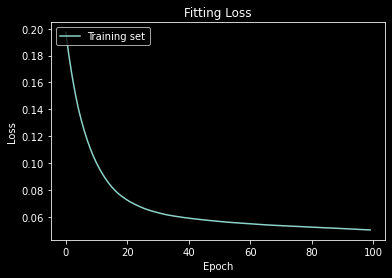

In [289]:
plt.plot(fit.history['loss'])
plt.title('Fitting Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set'], loc='upper left')
plt.show()

### Evaluating the Model

#### Prediction on the  Test Set

In [290]:
y_pred = ann.predict(X_test)

10/10 [==============================] - 0s 665us/step


### Checking the Model Accuracy

In [291]:
ann.evaluate(X_train, y_train)

40/40 [==============================] - 0s 588us/step - loss: 0.0502 - accuracy: 0.9346


[0.050180401653051376, 0.9345570802688599]

### Confusion Matrix

In [292]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = (y_pred > 0.5) #Classification metrics can't handle a mix of binary and continuous targets, so we change the target (y_pred) to binary, True/False
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for ANN")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print('\nAverage model prediction accuracy: {:.2%}\n'.format(accuracy))

Confusion matrix for ANN
[[  0  22]
 [  0 292]]

Average model prediction accuracy: 92.99%



## Conclusion

The predicted model accuracy using the ANN model is 92.99%.  This is slightly higher than the Logistic regression model built in the previous assignment.